<a href="https://colab.research.google.com/github/dscoder001/SENTIMENT-ANALYSIS/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







#  SENTIMENT ANALYSIS, NLP
<h3>  Author: Dhiman Saha<br>
Environment: Google colab</h3>

Libraries used:
<ul>
<li> np(for numpy array)</li>
<li> pd(panda datasets)</li>
<li>scikit-learn's:</li>
<ol >
<li>train_test_split(To train and split the data)</li>
<li>TfidfVectorizer (to create the Tf-Idf vectors)</li>
<li>Support Vector Classifier (SVC)</li>
<li>make_pipeline(scikit-learn's pipeline module)</li>
<li>MultinomialNB(scikit-learn's naive_bayes module)</li>
</ol>
</ul>

## Task 1:


---



This task comprises of extracting the Restaurant_Reviews related information.
 
The task is achived by following steps:

* Read the job posting file job_postings_raw.dat.
* Analysed the data to identify the patterns in the data.


###Step 1 - Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

###Step 2 - Reading job postings file
* Creating Table

In [ ]:
#Reading Dataset
#https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews?resource=download
df = pd.read_table('/content/Restaurant_Reviews (1).tsv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


###Step 3 - Cleaning the data

In [ ]:
#removing all duplicate emails from the dataframe
df = df.drop_duplicates(keep = 'last') 
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


<

###Step 4 - Gaing information about the data

In [ ]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

Graph of liked and unliked reviev

<Axes: >

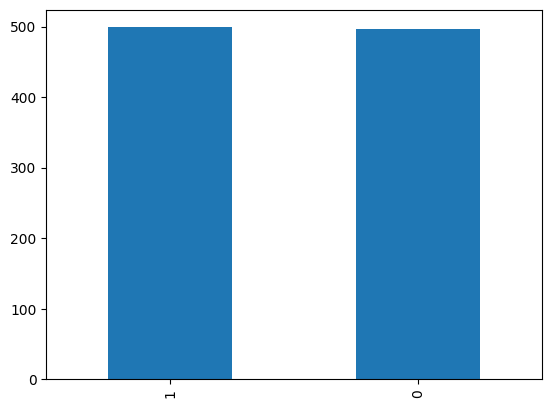

In [ ]:
df['Liked'].value_counts().plot(kind='bar',)



<h2>

##Task - 2:

---


This task comprises of extracting the resturant related information from a file. The extracted data has to be used to create a vocab and a count vector.

The task was achieved in the following steps:
<ul>
<li>Read the resturant_review dataset file containing the 'Review' colum to process
<li>Read the relevant review
<li>Apply the tokenization, word removals and stemming to produce good vocab, common English words (such as 'a', 'the', 'and', etc.) should be excluded from the feature set.
</ul>

###Step 1 - Extracting
<li>x variable is assigned the values from the 'Review' column of the DataFrame.</li>
<li>y variable is assigned the values from the 'Liked' column of the DataFrame.</li>

values attribute is used to obtain the numpy array containing the column values.

In [ ]:
# Extract the 'Review' column values as input features
x = df['Review'].values
# Extract the 'Liked' column values as target variable
y = df['Liked'].values

###Step 2 - Import train_test_split function from scikit-learn's model_selection module

* function is used to split the data into training and test sets

In [ ]:
# Split the data into training and test sets
# Set test_size=0.22 to allocate 22% of the data for testing
# Set random_state=11 for reproducible results
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22,random_state = 11)
#print the shape of x_train and x_test 
print(x_train.shape)
print(x_test.shape)

(776,)
(220,)


###Step 3 - Creating Vocab
* TfidfVectorizer is a useful tool for converting text documents into numerical representations based on term frequency-inverse document frequency (TF-IDF).
* TfidfVectorizer is initialized with the parameter stop_words='english'. This parameter specifies that common English words (such as 'a', 'the', 'and', etc.) should be excluded from the feature set, as they typically do not contribute much to the meaning of the text.
* It computes the TF-IDF values for the training data based on the learned vocabulary from x_train.
* It applies the learned vocabulary and TF-IDF calculations from the training data to the test data, resulting in a sparse matrix representation of the transformed test data.

* the sparse matrix representation of the training data x_train_vect into a dense array representation, which can be more convenient for certain operations or analysis that require array-like structures.

In [ ]:
# Import TfidfVectorizer from scikit-learn's feature_extraction.text module
#from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize TfidfVectorizer with stop_words='english'
vect = TfidfVectorizer(stop_words='english')

# Transform the test data using the fitted vectorizer
x_train_vect = vect.fit_transform(x_train)
# Transform the test data using the fitted vectorizer
x_test_vect = vect.transform(x_test) 

# Convert the training data to a dense array representation
x_train_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Task-3:


---


In this task the training and test data will be fitted to the model, and the the best model will be stelected.<br>
This task comprises of following steps:
* classification tasks using Support Vector Machines (SVM) and scikit-learn's naive_bayes module.
* Create a pipeline combining models.
* Check for best accuracy score.



###Step 1- classifying the model
* Import Classification module from scikit-learn's.
* Fit the model to training data.
* Check the accuracy Score.


METHOD-1: SVC

In [ ]:
# Import the Support Vector Classifier (SVC) class from scikit-learn's svm module
from sklearn.svm import SVC 
# Create an instance of SVC
model_svc = SVC()
# Fit the SVC model to the training data
model_svc.fit(x_train_vect,y_train)
# Make predictions on the test data using the trained model
y_pred_svc = model_svc.predict(x_test_vect)
# Display the predicted values
y_pred_svc

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
#check the accuracy score
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred_svc,y_test)

0.8

###Step 2 - Usig pipelines
* Create a pipeline that applies the TfidfVectorizer to the input text data, followed by the classifier.
* Fits the pipeline to the training data.
* Predict and check the acurracy score.

Method-1.1: TfidfVectorizer and SVC


In [ ]:
#Method 1.1 Pipeline 
# Import the make_pipeline function from scikit-learn's pipeline module
from sklearn.pipeline import make_pipeline
# Create a pipeline combining TfidfVectorizer and SVC 
model2 = make_pipeline(TfidfVectorizer(),SVC()) 

# Fit the pipeline to the training data
model2.fit(x_train,y_train)
# Make predictions on the test data using the pipeline
y_pred2 = model2.predict(x_test)
#Display predictions
y_pred2

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred2,y_test)

0.8272727272727273

Method-2: MultinomialNB

In [ ]:
#Method 2 MultinomialNB
# Import the MultinomialNB class from scikit-learn's naive_bayes module
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
# Create an instance of MultinomialNB
model3.fit(x_train_vect,y_train)
# Make predictions on the test data using the trained MultinomialNB model
y_pred3 = model3.predict(x_test_vect)

y_pred3

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
#Check accuracy scored
accuracy_score(y_pred3,y_test)

0.7954545454545454

METHOD 2.1: NB + Countvectorizer/TfidfVectorizer pipeline

In [ ]:
#METHOD 2.1 NB + Countvectorizer/TfidfVectorizer pipeline
# Import the make_pipeline function from scikit-learn's pipeline module
from sklearn.pipeline import make_pipeline
# Create a pipeline combining TfidfVectorizer and MultinomialNB
model4 = make_pipeline(TfidfVectorizer(),MultinomialNB())
# Fit the pipeline to the training data
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
accuracy_score(y_pred4,y_test)

0.8136363636363636

Comparimg the accuracy score

In [ ]:
#For countvectorizer 

# accuracy score - 0.781  (SVC)
# accuracy score - 0.8  (SVC pipeline)
# accuracy score - 0.7863636363636364 (MultinomialNB)
# accuracy score - 0.8045454545454546 (MultinomialNB pipeline) 

In [ ]:
#For TfidfVectorizer

#accuracy score - 0.8  (SVC)
# accuracy score - 0.8272727272727273 (SVC pipeline) 
# accuracy score - 0.7954545454545454 (MultinomialNB)
# accuracy score - 0.8136363636363636(MultinomialNB pipeline)


###Method-1.1 TfidfVectorizer and SVC: has the best accuracy score - 0.8272727272727273 (SVC pipeline)

##End Task:


---


The import joblib statement imports the joblib module, which provides utilities for serialization (saving) and deserialization (loading) of Python objects, including machine learning models. It is commonly used in conjunction with Scikit-learn to save and load trained models.

In [ ]:
# Import the joblib module for model serialization
import joblib 
# Save the trained model to a file
joblib.dump(model2,'Review-Liked')

['Review-Liked']

In [ ]:
#Load the serialized model into a new object
import joblib
reload_model = joblib.load('Review-Liked')

In [ ]:
reload_model.predict(['good'])

array([1])

In [ ]:
reload_model.predict(['dont like it'])

array([0])

In [ ]:
reload_model.predict(['awesome'])

array([1])

###Joblib Summary:
 The joblib.load('Review-Liked') line loads the serialized model stored in the file 'Review-Liked' and deserializes it, creating a new object reload_model. The load() function from the joblib module is used to read the serialized data from the file and reconstruct the original model object. This allows you to reload the trained model later and use it for making predictions or performing other operations.

By using joblib.dump() and joblib.load(), you can save and load machine learning models, providing a convenient way to store trained models and reuse them without the need for retraining.








##Creating a Webapp:


In [ ]:
#STREAMLIT (used to create the webapp)
!pip install streamlit --quiet 

In [ ]:
%%writefile app.py

import streamlit as st
import joblib

st.title("SENTIMENT ANALYSIS")
reload_model = joblib.load('Review-Liked')

ip = st.text_input("Enter the review/text :")
op = reload_model.predict([ip])

review = ['Negative', 'Positive']
if st.button('PREDICT'):
  st.title(review[op[0]])


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] \ fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.146.20:8501

npx: installed 22 in 4.651s
your url is: https://puny-terms-invent.loca.lt
  Stopping...
^C


#References
* The pandas Project. (2022). pandas 0.23.4 documentation: pandas.DataFrame. Retrived from-https://pandas.pydata.org/pandas-docs/stable/
* scikit-learn 1.1.0 is available for download - https://scikit-learn.org/stable/whats_new/v1.1.html#version-1-1-0
* Kaggle-Dataset for Natural language Processing from-https://www.kaggle.com/